## Exercise 1

a, b, c)

In [1]:
 import pandas as pd
 import duckdb
 
 df = pd.read_csv("data/1900-census-immigrant-pop-metro.csv")
 df

,City,State,Error,Total foreign born,Africa,"Asia (except China, Japan, and India)",Atlantic Islands,Australia,Austria,Belgium,...,Scotland,South America,Spain,Sweden,Switzerland,Turkey,Wales,West Indies (except Cuba and Puerto Rico),Other countries,Born at sea
0,Akron,Ohio,0,"7,127",4.0,NaN,NaN,1,190,9,...,187,1.0,2,200,258,NaN,226,8,NaN,6.0
1,Albany,New York,55,"17,718",3.0,39.0,4,13,106,13,...,395,1.0,1,65,64,21,80,4,3.0,15.0
2,Allegheny,Pennsylvania,0,"30,216",4.0,5.0,2,8,"3,929",10,...,"1,183",2.0,2,186,488,4,798,4,3.0,25.0
3,Allentown,Pennsylvania,3,"2,991",NaN,1.0,NaN,2,337,2,...,66,1.0,NaN,5,26,3,40,2,3.0,1.0
4,Altoona,Pennsylvania,65,"3,301",2.0,7.0,NaN,NaN,57,2,...,98,2.0,1,32,55,25,23,1,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Woonsocket,Rhode Island,5,"12,518",1.0,15.0,NaN,1,52,64,...,131,8.0,NaN,45,7,25,7,2,NaN,1.0
157,Worcester,Massachusetts,10,"37,652",1.0,192.0,11,12,103,20,...,714,8.0,2,"7,542",21,614,40,38,55.0,4.0
158,Yonkers,New York,65,"14,634",2.0,26.0,4,7,"1,032",6,...,572,2.0,2,289,75,18,45,19,4.0,9.0
159,York,Pennsylvania,5,"1,304",2.0,2.0,NaN,NaN,64,1,...,25,NaN,1,10,18,1,7,1,NaN,1.0


In [2]:
df = df.fillna("0")

In [3]:
df.columns

Index(['City', 'State', 'Error', 'Total foreign born', 'Africa',
       'Asia (except China, Japan, and India)', 'Atlantic Islands',
       'Australia', 'Austria', 'Belgium', 'Bohemia', 'Canada (English)',
       'Canada (French)', 'Central America', 'China', 'Cuba', 'Denmark',
       'England', 'Europe (not otherwise specified)', 'Finland', 'France',
       'Germany', 'Greece', 'Holland', 'Hungary', 'India', 'Ireland', 'Italy',
       'Japan', 'Luxemburg', 'Mexico', 'Norway',
       'Pacific Islands (except Phillipine Islands)', 'Poland (Austrian)',
       'Poland (German)', 'Poland (Russian)', 'Poland (unknown)', 'Portugal',
       'Roumania', 'Russia', 'Scotland', 'South America', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Wales',
       'West Indies (except Cuba and Puerto Rico)', 'Other countries',
       'Born at sea'],
      dtype='object')

In [4]:
columns_to_change_type = ["Denmark", "Sweden", "Norway", "Finland", "Total foreign born"]
df[columns_to_change_type].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Denmark             161 non-null    object
 1   Sweden              161 non-null    object
 2   Norway              161 non-null    object
 3   Finland             161 non-null    object
 4   Total foreign born  161 non-null    object
dtypes: object(5)
memory usage: 6.4+ KB


In [5]:
for column in columns_to_change_type:
    df[column] = df[column].str.replace(",", "").astype(int)
    
df[columns_to_change_type].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Denmark             161 non-null    int64
 1   Sweden              161 non-null    int64
 2   Norway              161 non-null    int64
 3   Finland             161 non-null    int64
 4   Total foreign born  161 non-null    int64
dtypes: int64(5)
memory usage: 6.4 KB


In [6]:
df_nordic = duckdb.query(
    """--sql     
        WITH nordic AS (
        FROM df 
            SELECT 
                state, 
                SUM("Total foreign born") as "Total foreigners", 
                SUM("Sweden") as Swedes, 
                SUM("Norway") as Norwegians, 
                SUM("Denmark") as Danish, 
                SUM("Finland") as Finnish, 
            GROUP BY
                state
        )
        FROM nordic n
        SELECT 
            *,
            n.swedes + n.norwegians + n.danish + n.finnish AS Nordic
        ORDER BY 
            nordic
        DESC
             """
).df() # The second to create another column called Nordic

df_nordic.head()

,State,Total foreigners,Swedes,Norwegians,Danish,Finnish,Nordic
0,Illinois,627465.0,57158.0,22300.0,10374.0,447.0,90279.0
1,Minnesota,128823.0,34984.0,17087.0,2975.0,1101.0,56147.0
2,New York,1521931.0,29961.0,11752.0,6186.0,3764.0,51663.0
3,Massachusetts,567170.0,21971.0,2366.0,1451.0,3154.0,28942.0
4,Wisconsin,124230.0,4034.0,6485.0,4024.0,405.0,14948.0


In [7]:
top_3_nordic = ( df_nordic.drop(["Nordic", "Total foreigners"], axis=1).set_index("State").head(3)
)

top_3_nordic

,Swedes,Norwegians,Danish,Finnish
State,,,,
Illinois,57158.0,22300.0,10374.0,447.0
Minnesota,34984.0,17087.0,2975.0,1101.0
New York,29961.0,11752.0,6186.0,3764.0


<Axes: title={'left': 'Annotate with arrows'}, xlabel='State', ylabel='Number of foreigners'>

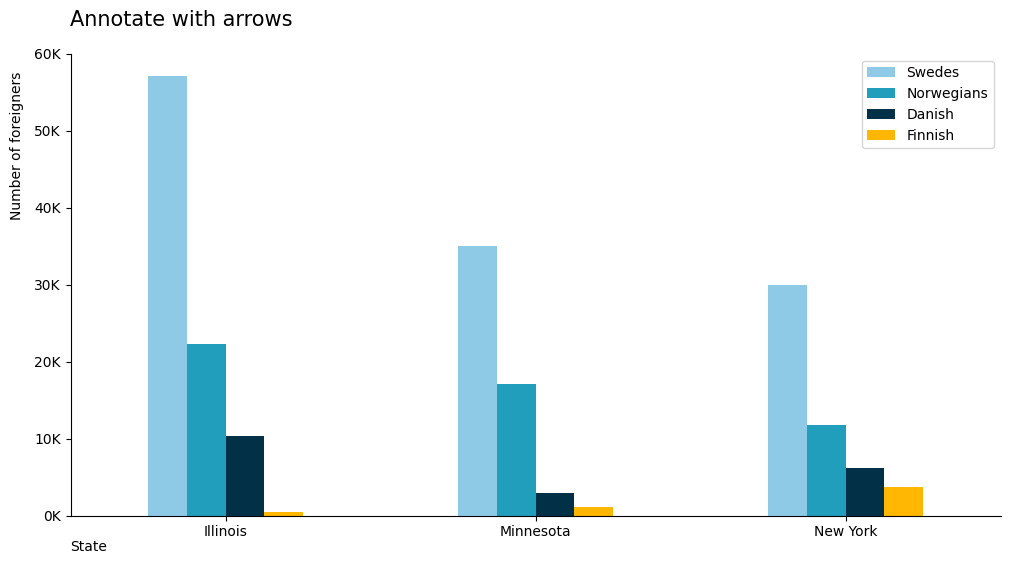

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from constants import blue_1, blue_2, dark_blue, orange_1, orange_2
custom_colors = [blue_1, blue_2, dark_blue, orange_1]


def nordic_plot():
    ax = top_3_nordic.plot(kind = "bar", figsize=(12,6), color=custom_colors)
    ax.set_xticklabels(top_3_nordic.index, rotation = 0)
    ax.spines[["top", "right"]].set_visible(False)
    
    ax.set_title("Annotate with arrows", loc = "left", pad = 20, fontsize = 15)
    
    ax.set_xlabel("State", loc = "left", labelpad=0.5)
    ax.set_ylabel("Number of foreigners", labelpad=0.5)
    ax.yaxis.set_label_coords(-0.05, 0.8)
    
    formatter = FuncFormatter(lambda x,_: f"{int(x/1000)}K")
    ax.yaxis.set_major_formatter(formatter)
    
    return ax

ax = nordic_plot()

ax


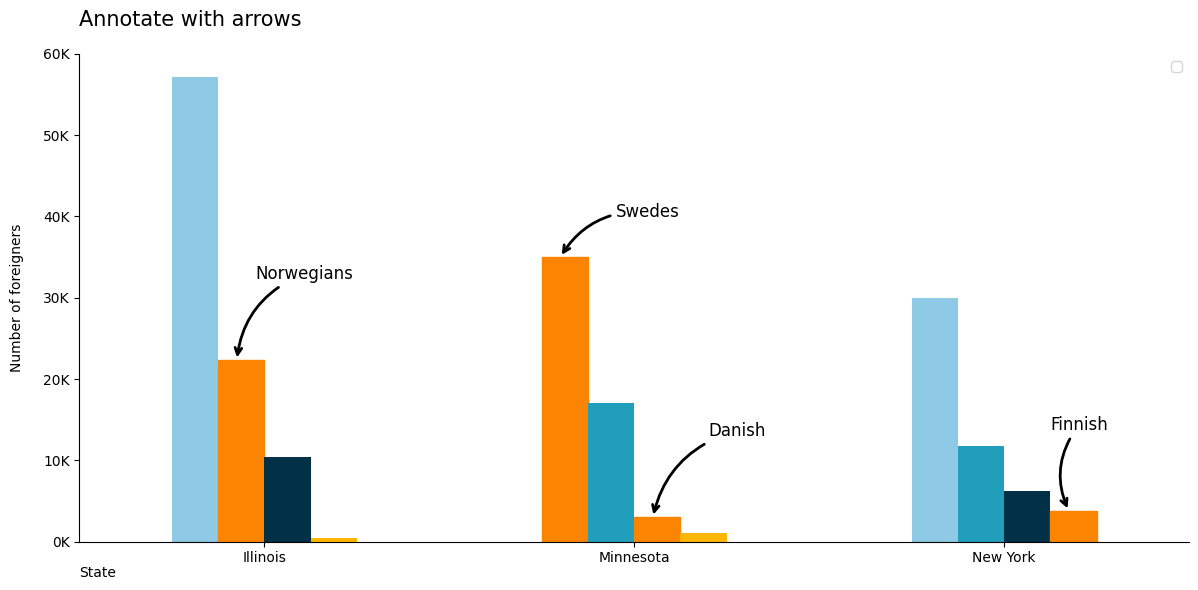

In [9]:





ax = nordic_plot()


# Tuple unpacking of ax.containers that is a ist of four barcontainers, which contains 3 artists each

swede_bars, norwegian_bars, danish_bars, finnish_bars = ax.containers

# Highlight the bars being annotated
swede_bars[1].set_color(orange_2)
norwegian_bars[0].set_color(orange_2)
finnish_bars[2].set_color(orange_2)
danish_bars[1].set_color(orange_2)


def annotate_nordic(bar_artist, text, x_offset=0.3, y_offset=5000):
    xy = (bar_artist.get_x(), bar_artist.get_height())
    
    # ternary statement
    rad = -0.3 if x_offset < 0 else 0.3

    arrowprops = dict(arrowstyle="->", connectionstyle=f"arc3, rad={rad}", linewidth=2)

    ax.annotate(
        text=text,
        xy=(xy[0] + 0.05, xy[1]),
        xytext=(xy[0] + x_offset, xy[1] + y_offset),
        arrowprops=arrowprops,
        fontsize=12,
    )

annotate_nordic(swede_bars[1], "Swedes", x_offset=0.2, y_offset=5000)
annotate_nordic(norwegian_bars[0], "Norwegians", x_offset=0.1, y_offset=10000)
annotate_nordic(finnish_bars[2], "Finnish", x_offset=0, y_offset=10000)
annotate_nordic(danish_bars[1], "Danish", x_offset=0.2, y_offset=10000)

ax.set(ylabel="Number of foreigners")
ax.legend("")

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/arrow_annotations.png")

d)

In [10]:
df.columns

Index(['City', 'State', 'Error', 'Total foreign born', 'Africa',
       'Asia (except China, Japan, and India)', 'Atlantic Islands',
       'Australia', 'Austria', 'Belgium', 'Bohemia', 'Canada (English)',
       'Canada (French)', 'Central America', 'China', 'Cuba', 'Denmark',
       'England', 'Europe (not otherwise specified)', 'Finland', 'France',
       'Germany', 'Greece', 'Holland', 'Hungary', 'India', 'Ireland', 'Italy',
       'Japan', 'Luxemburg', 'Mexico', 'Norway',
       'Pacific Islands (except Phillipine Islands)', 'Poland (Austrian)',
       'Poland (German)', 'Poland (Russian)', 'Poland (unknown)', 'Portugal',
       'Roumania', 'Russia', 'Scotland', 'South America', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Wales',
       'West Indies (except Cuba and Puerto Rico)', 'Other countries',
       'Born at sea'],
      dtype='object')

In [14]:
df["Born at sea"] = pd.to_numeric(df["Born at sea"], errors="coerce")

top5_sea = df.nlargest(5, "Born at sea")


top5_sea[["City", "Born at sea"]]



,City,Born at sea
98,New York,447.0
27,Chicago,315.0
107,Philadelphia,177.0
122,St. Louis,132.0
14,Boston,111.0


In [ ]:
df_sea = duckdb.query(
    """--sql     
        
        FROM df 
            SELECT 
                state, 
                SUM("Total foreign born") as "Total foreigners", 
                SUM("Sweden") as Swedes, 
                SUM("Norway") as Norwegians, 
                SUM("Denmark") as Danish, 
                SUM("Finland") as Finnish, 
            GROUP BY
                state
        )
        FROM nordic n
        SELECT 
            *,
            n.swedes + n.norwegians + n.danish + n.finnish AS Nordic
        ORDER BY 
            nordic
        DESC
             """
).df() # The second to create another column called Nordic

df_nordic.head()